In [ ]:
!apt install swig cmake libopenmpi-dev zlib1g-dev
!pip install stable-baselines==2.5.1 box2d box2d-kengz
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install xvfbwrapper
!apt-get update
!sudo apt-get install xvfb
!apt-get install xdpyinfo

Reading package lists... Done
Building dependency tree       
Reading state information... Done
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
zlib1g-dev set to manually installed.
libopenmpi-dev is already the newest version (2.1.1-8).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 0s (8,885 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 160772 files and dire

In [ ]:
pip install deap

     |████████████████████████████████| 163kB 11.7MB/s 


In [1]:
import gym 
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40)

import deap
from deap import base, algorithms
from deap import creator
from deap import tools

import numpy as np
import random
import matplotlib.pyplot as plt
import glob
import io
import base64
import time

from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display

%matplotlib inline

In [ ]:
'''# Создаем объект дисплей, таким образом, симуляцию можно будет наблюдать в колабе
display = Display(visible=0, size=(1400, 900))
display.start()'''

In [ ]:
'''def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env'''

In [2]:
# Запуск среды
env = gym.make('MountainCar-v0')   #LunarLander-v2

gen	nevals	min     	avg    	values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

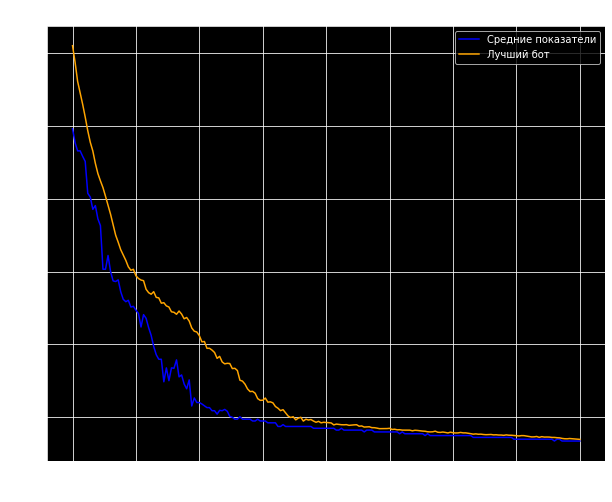

In [3]:
# GA
ln = 200
n = 100
cross = 0.8
mut = 0.4
max_gen = 200
numb_samples = 5

hof = tools.HallOfFame(numb_samples)

random_seed = 17
random.seed(random_seed)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


toolbox = base.Toolbox()
toolbox.register("randomAction", random.randint, 0, 2)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.randomAction, ln)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n)

def getCarScore(individual):
    flag = 0.5
    observation = env.reset()
    actionCounter = 0

    for action in individual:
        actionCounter += 1
        observation, reward, done, info = env.step(action)

        if done:
            break

    if actionCounter < ln:
        score = 0 - (ln - actionCounter) / ln
    else:
        score = abs(observation[0] - flag)

    return score,


toolbox.register("evaluate", getCarScore)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=2, indpb=1.0/ln)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)
stats.register("values", np.array)

population, logbook = algorithms.eaSimple(population, toolbox,
                                        cxpb=cross,
                                        mutpb=mut,
                                        ngen=max_gen,
                                        halloffame=hof,
                                        stats=stats,
                                        verbose=True)

maxFitnessValues, meanFitnessValues, vals = logbook.select('min', 'avg', 'values')

print(hof.items[0])

plt.figure(figsize=(10, 8))
plt.plot(maxFitnessValues, color='blue', label='Средние показатели')
plt.plot(meanFitnessValues, color='orange', label='Лучший бот')
plt.xlabel('Поколение', fontsize=12)
plt.ylabel('Приспособленность', fontsize=12)
plt.title('Максимальная и Средняя приспособленность по поколениям', fontsize=16)
plt.legend()
plt.grid()

plt.show()

В Visual Studio Code работает. А в Colab нет.

In [4]:
# Визуализация
observation = env.reset()
for action in hof.items[0]:
    env.step(action)
    env.render()

env.close()


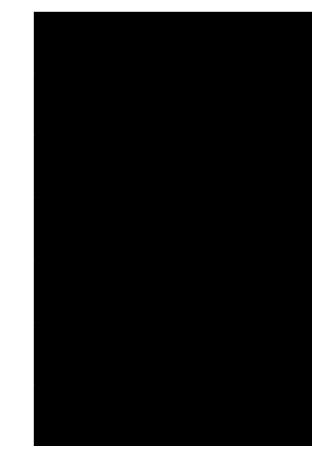

In [5]:
plt.ion()
fig, ax = plt.subplots(figsize=(5, 8))

line, = ax.plot(vals[0], ' o', markersize=1, color='yellow')
ax.set_ylim(40, 110)

for v in vals:
    line.set_ydata(v)

    plt.draw()
    plt.gcf().canvas.flush_events()

    time.sleep(0.1)

plt.ioff()
plt.show()